In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pwd

'/Users/edeldepssi/Desktop/my_files/tutorial/assignments/Project4_AirQuality/notebooks'

In [3]:
data = pd.read_csv('../data/Weather Data/California 1980-01-01 to 2022-09-01.csv')

Resources:
    - https://www.visualcrossing.com/weather/weather-data-services

In [4]:
data.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,California,1980-01-01,56.2,42.7,49.6,56.2,42.7,48.7,49.0,97.90,...,NaN,NaN,NaN,1980-01-01T07:23:47,1980-01-01T16:55:07,0.50,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"74516023202,72483023232,72483993225"
1,California,1980-01-02,54.1,39.8,46.1,54.1,39.2,45.4,44.8,95.67,...,NaN,NaN,NaN,1980-01-02T07:23:56,1980-01-02T16:55:55,0.50,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"74516023202,72483023232,72483993225"
2,California,1980-01-03,50.1,41.6,45.2,50.1,38.2,42.4,43.8,94.65,...,NaN,NaN,NaN,1980-01-03T07:24:02,1980-01-03T16:56:45,0.51,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"74516023202,72483023232,72483993225"
3,California,1980-01-04,50.1,43.1,45.9,50.1,38.9,43.6,44.6,95.21,...,NaN,NaN,NaN,1980-01-04T07:24:06,1980-01-04T16:57:37,0.53,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"74516023202,72483023232,72483993225"
4,California,1980-01-05,55.0,42.6,48.2,55.0,40.4,47.0,46.2,93.28,...,NaN,NaN,NaN,1980-01-05T07:24:09,1980-01-05T16:58:29,0.55,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"74516023202,72483023232,72483993225"


In [5]:
data.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [6]:
dropped_columns = ['name', 'stations', 'icon', 'description', 'moonphase', 'sunset', 'sunrise', 'feelslike', 'feelslikemax',
              'feelslikemax', 'tempmin', 'tempmax', 'visibility', 'cloudcover', 'winddir', 'dew', 'feelslikemin',
                   'precipprob', 'precipcover', 'snow']

In [7]:
data = data.drop(columns=dropped_columns)

In [8]:
data.head(3)

,datetime,temp,humidity,precip,preciptype,snowdepth,windgust,windspeed,sealevelpressure,solarradiation,solarenergy,uvindex,severerisk,conditions
0,1980-01-01,49.6,97.90,0.01,NaN,NaN,NaN,14.3,1022.3,NaN,NaN,NaN,NaN,"Rain, Partially cloudy"
1,1980-01-02,46.1,95.67,0.00,NaN,NaN,NaN,9.5,1021.6,NaN,NaN,NaN,NaN,Partially cloudy
2,1980-01-03,45.2,94.65,0.00,NaN,NaN,NaN,10.3,1020.5,NaN,NaN,NaN,NaN,Partially cloudy


In [9]:
data = data.fillna(0)

In [10]:
data.isnull().sum()

datetime            0
temp                0
humidity            0
precip              0
preciptype          0
snowdepth           0
windgust            0
windspeed           0
sealevelpressure    0
solarradiation      0
solarenergy         0
uvindex             0
severerisk          0
conditions          0
dtype: int64

In [11]:
data['datetime'] = pd.to_datetime(data['datetime'])

In [12]:
data['year'] = data['datetime'].dt.year

In [13]:
data.corr()

,temp,humidity,precip,snowdepth,windgust,windspeed,sealevelpressure,solarradiation,solarenergy,uvindex,severerisk,year
temp,1.000000,-0.710651,-0.137352,-0.016105,0.093706,0.089689,-0.625576,0.230544,0.230515,0.173328,0.037575,0.039507
humidity,-0.710651,1.000000,0.247191,-0.034207,-0.146025,-0.178758,0.387466,-0.269657,-0.269772,-0.230567,-0.077076,-0.095656
precip,-0.137352,0.247191,1.000000,0.020539,0.062762,0.201019,-0.113348,-0.075588,-0.075748,-0.068825,-0.019205,-0.009370
snowdepth,-0.016105,-0.034207,0.020539,1.000000,0.095267,0.093344,0.000251,0.027106,0.027269,0.035925,-0.004752,0.034707
windgust,0.093706,-0.146025,0.062762,0.095267,1.000000,0.242398,-0.183894,0.432032,0.432069,0.435851,0.141090,0.483224
windspeed,0.089689,-0.178758,0.201019,0.093344,0.242398,1.000000,-0.319585,-0.060600,-0.060587,-0.084869,0.015269,-0.139280
sealevelpressure,-0.625576,0.387466,-0.113348,0.000251,-0.183894,-0.319585,1.000000,-0.132923,-0.132787,-0.089944,0.002852,-0.008048
solarradiation,0.230544,-0.269657,-0.075588,0.027106,0.432032,-0.060600,-0.132923,1.000000,0.999978,0.982747,0.182620,0.696258
solarenergy,0.230515,-0.269772,-0.075748,0.027269,0.432069,-0.060587,-0.132787,0.999978,1.000000,0.982725,0.183685,0.696180
uvindex,0.173328,-0.230567,-0.068825,0.035925,0.435851,-0.084869,-0.089944,0.982747,0.982725,1.000000,0.195862,0.740020


<AxesSubplot:>

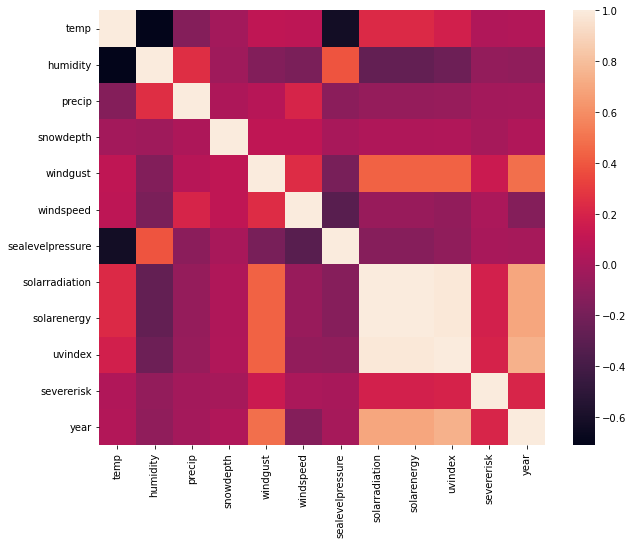

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr())

# Definitions:
- Wind Gust: a sudden, brief increase in speed of the wind.
- uvindex: ultra violet represents the amount of skin-damaging UV radiation reaching the earth's surface
- severerisk: Enhanced Risk means a widespread concentration of low-to-moderate intensity severe thunderstorms.
- solarenergy: The energy, heat, and light from the sun flow away in the form of electromagnetic radiation (EMR)
- solarradiation: electromagnetic radiation emitted by the sun.

<AxesSubplot:>

<Figure size 1000x1000 with 0 Axes>

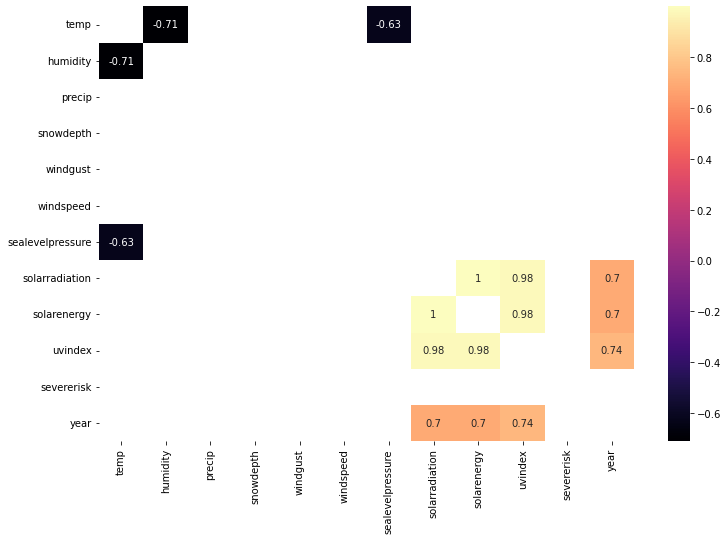

In [15]:
plt.figure(figsize=(10,10), dpi=100)
data_corr = data.corr()

kot = data_corr[((data_corr>=.6 )| (data_corr <= -.6)) & (data_corr !=1.000)]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap='magma', annot=True)

## Highly correlated features:

In [16]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(data, .6)

temp            humidity           -0.710651
                sealevelpressure   -0.625576
solarenergy     year                0.696180
solarradiation  year                0.696258
uvindex         year                0.740020
solarenergy     uvindex             0.982725
solarradiation  uvindex             0.982747
                solarenergy         0.999978
temp            temp                     NaN
dtype: float64

In [17]:
data['rains'] = data['conditions'].apply(lambda x: 1 if 'Rain' in x else 0)

In [25]:
columns = ['temp', 'humidity', 'precip', 'preciptype', 'snowdepth', 'windgust',
       'windspeed', 'sealevelpressure', 'solarradiation', 'solarenergy',
       'uvindex', 'severerisk', 'conditions', 'year', 'rains']

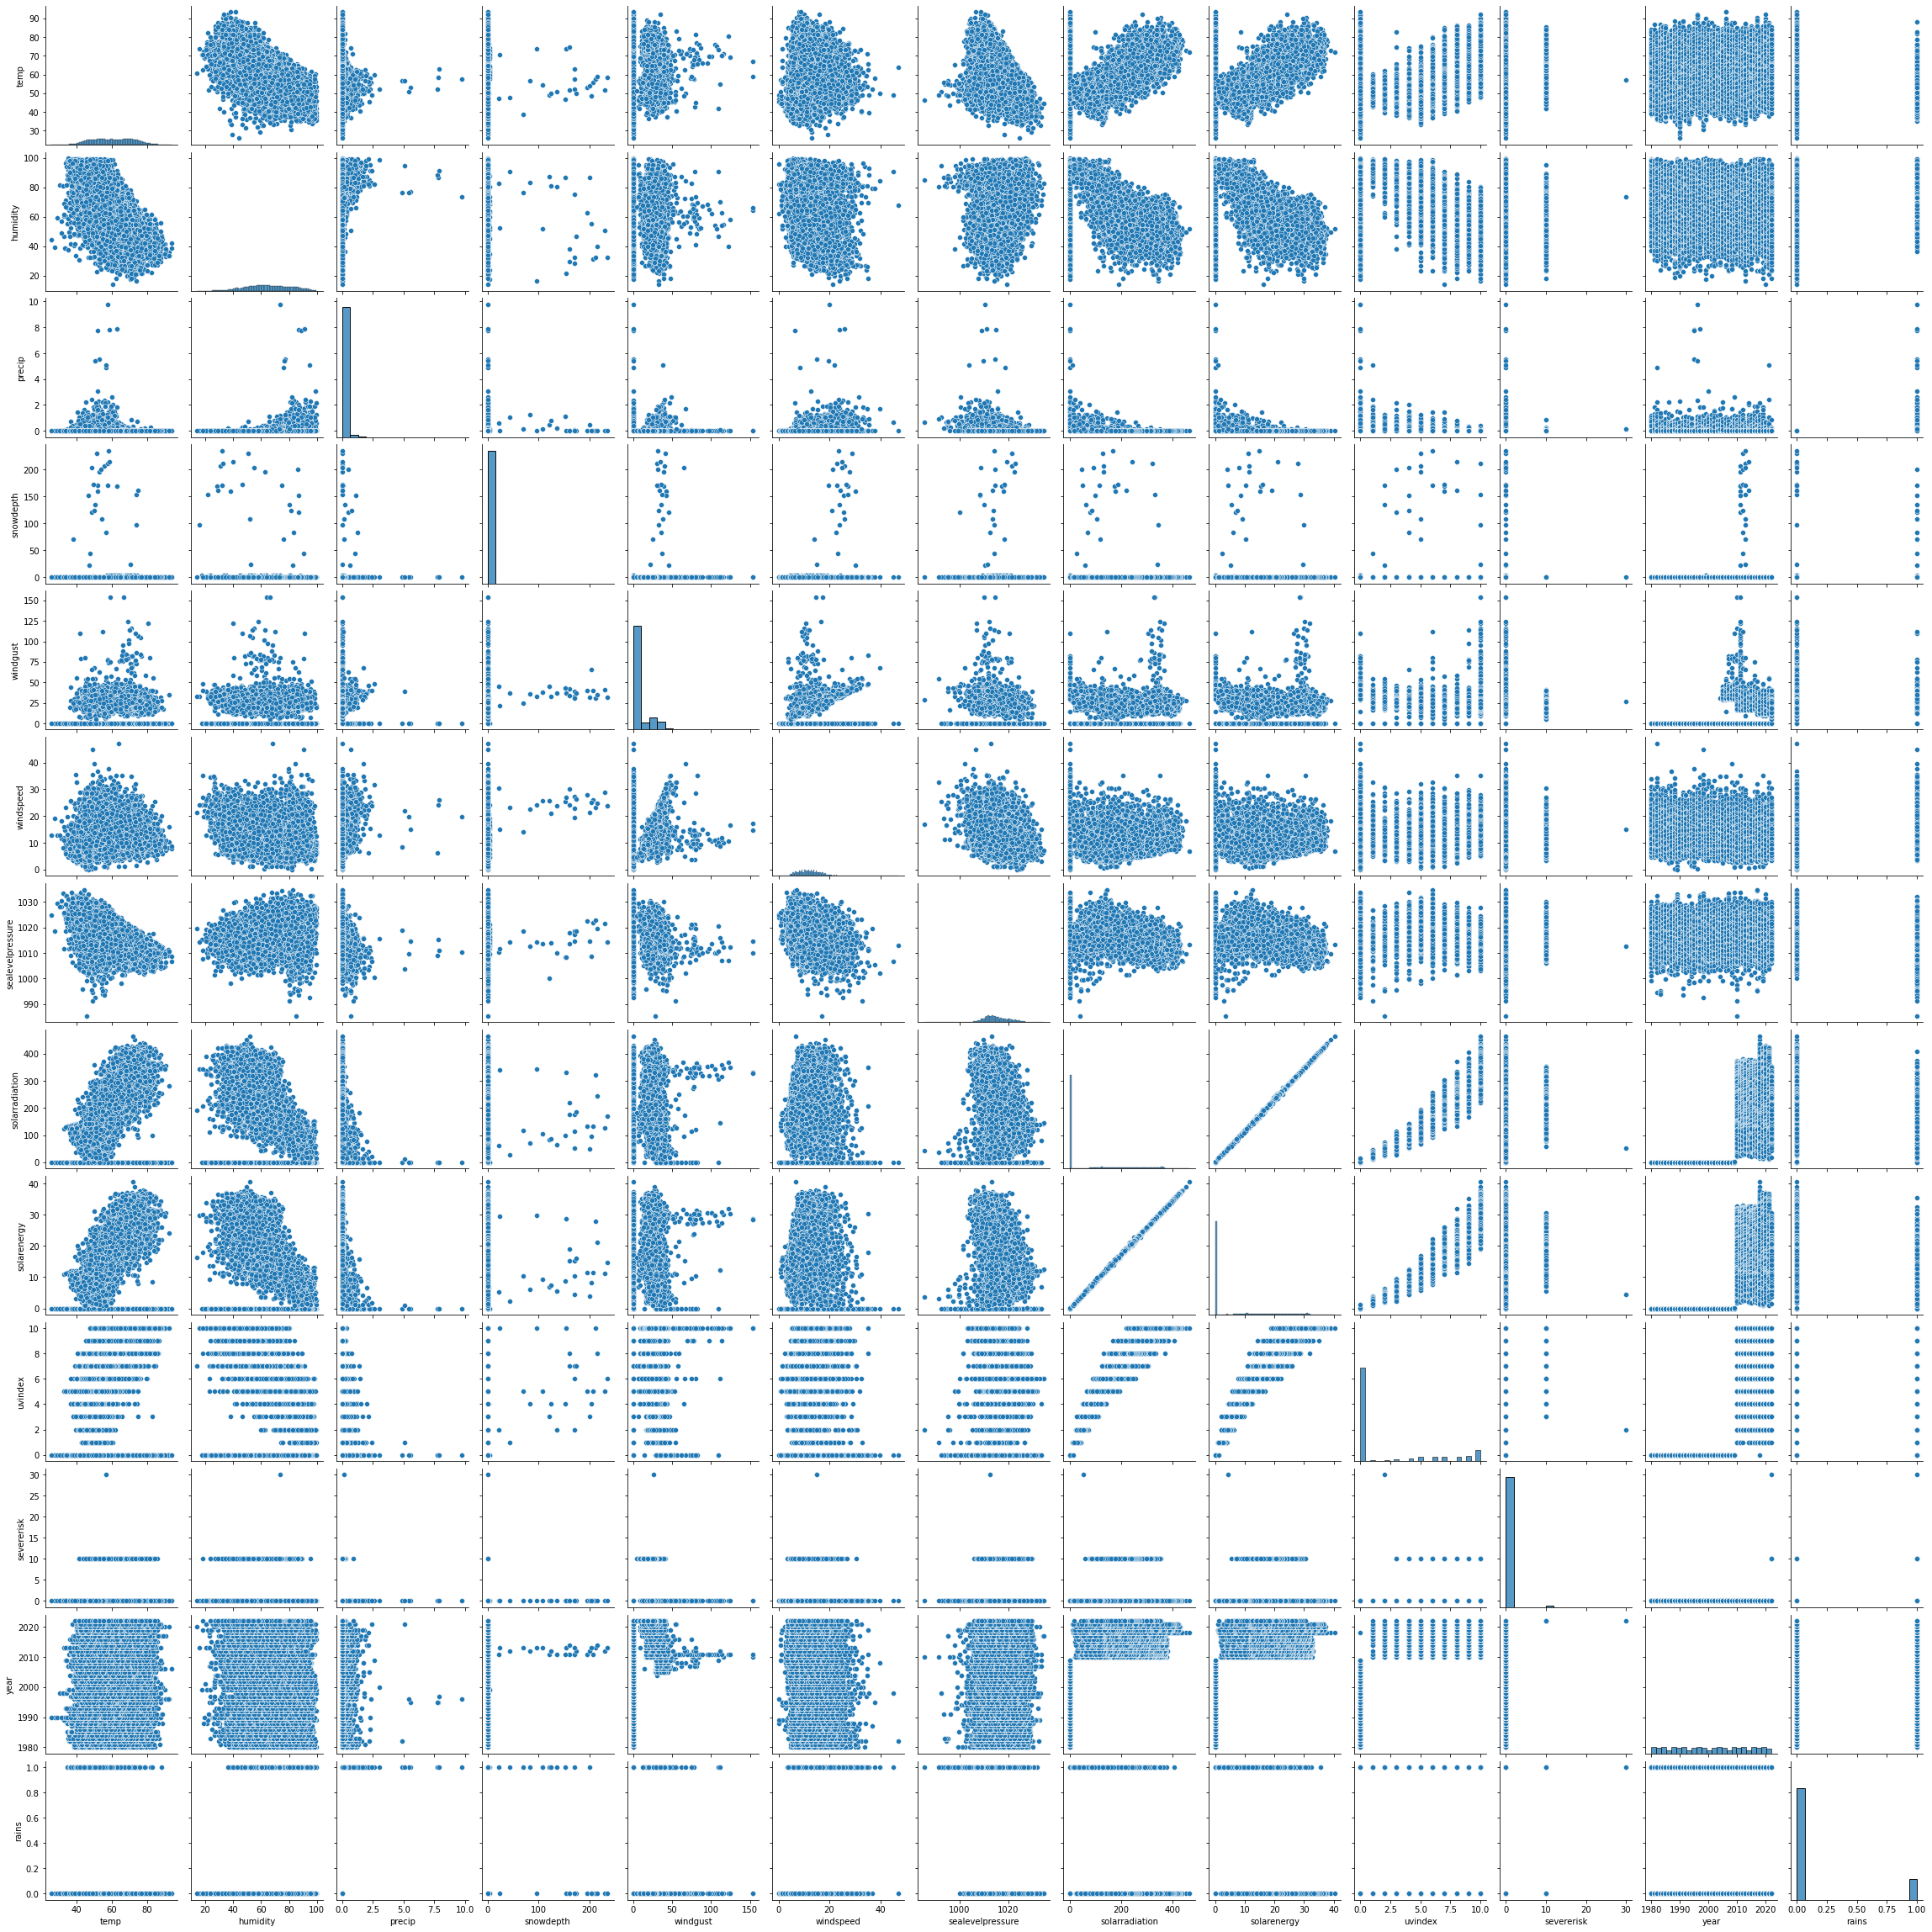

In [26]:
sns.pairplot(data[columns])

In [27]:
data.columns

Index(['datetime', 'temp', 'humidity', 'precip', 'preciptype', 'snowdepth',
       'windgust', 'windspeed', 'sealevelpressure', 'solarradiation',
       'solarenergy', 'uvindex', 'severerisk', 'conditions', 'year', 'rains'],
      dtype='object')

In [30]:
sns.set_style('whitegrid')

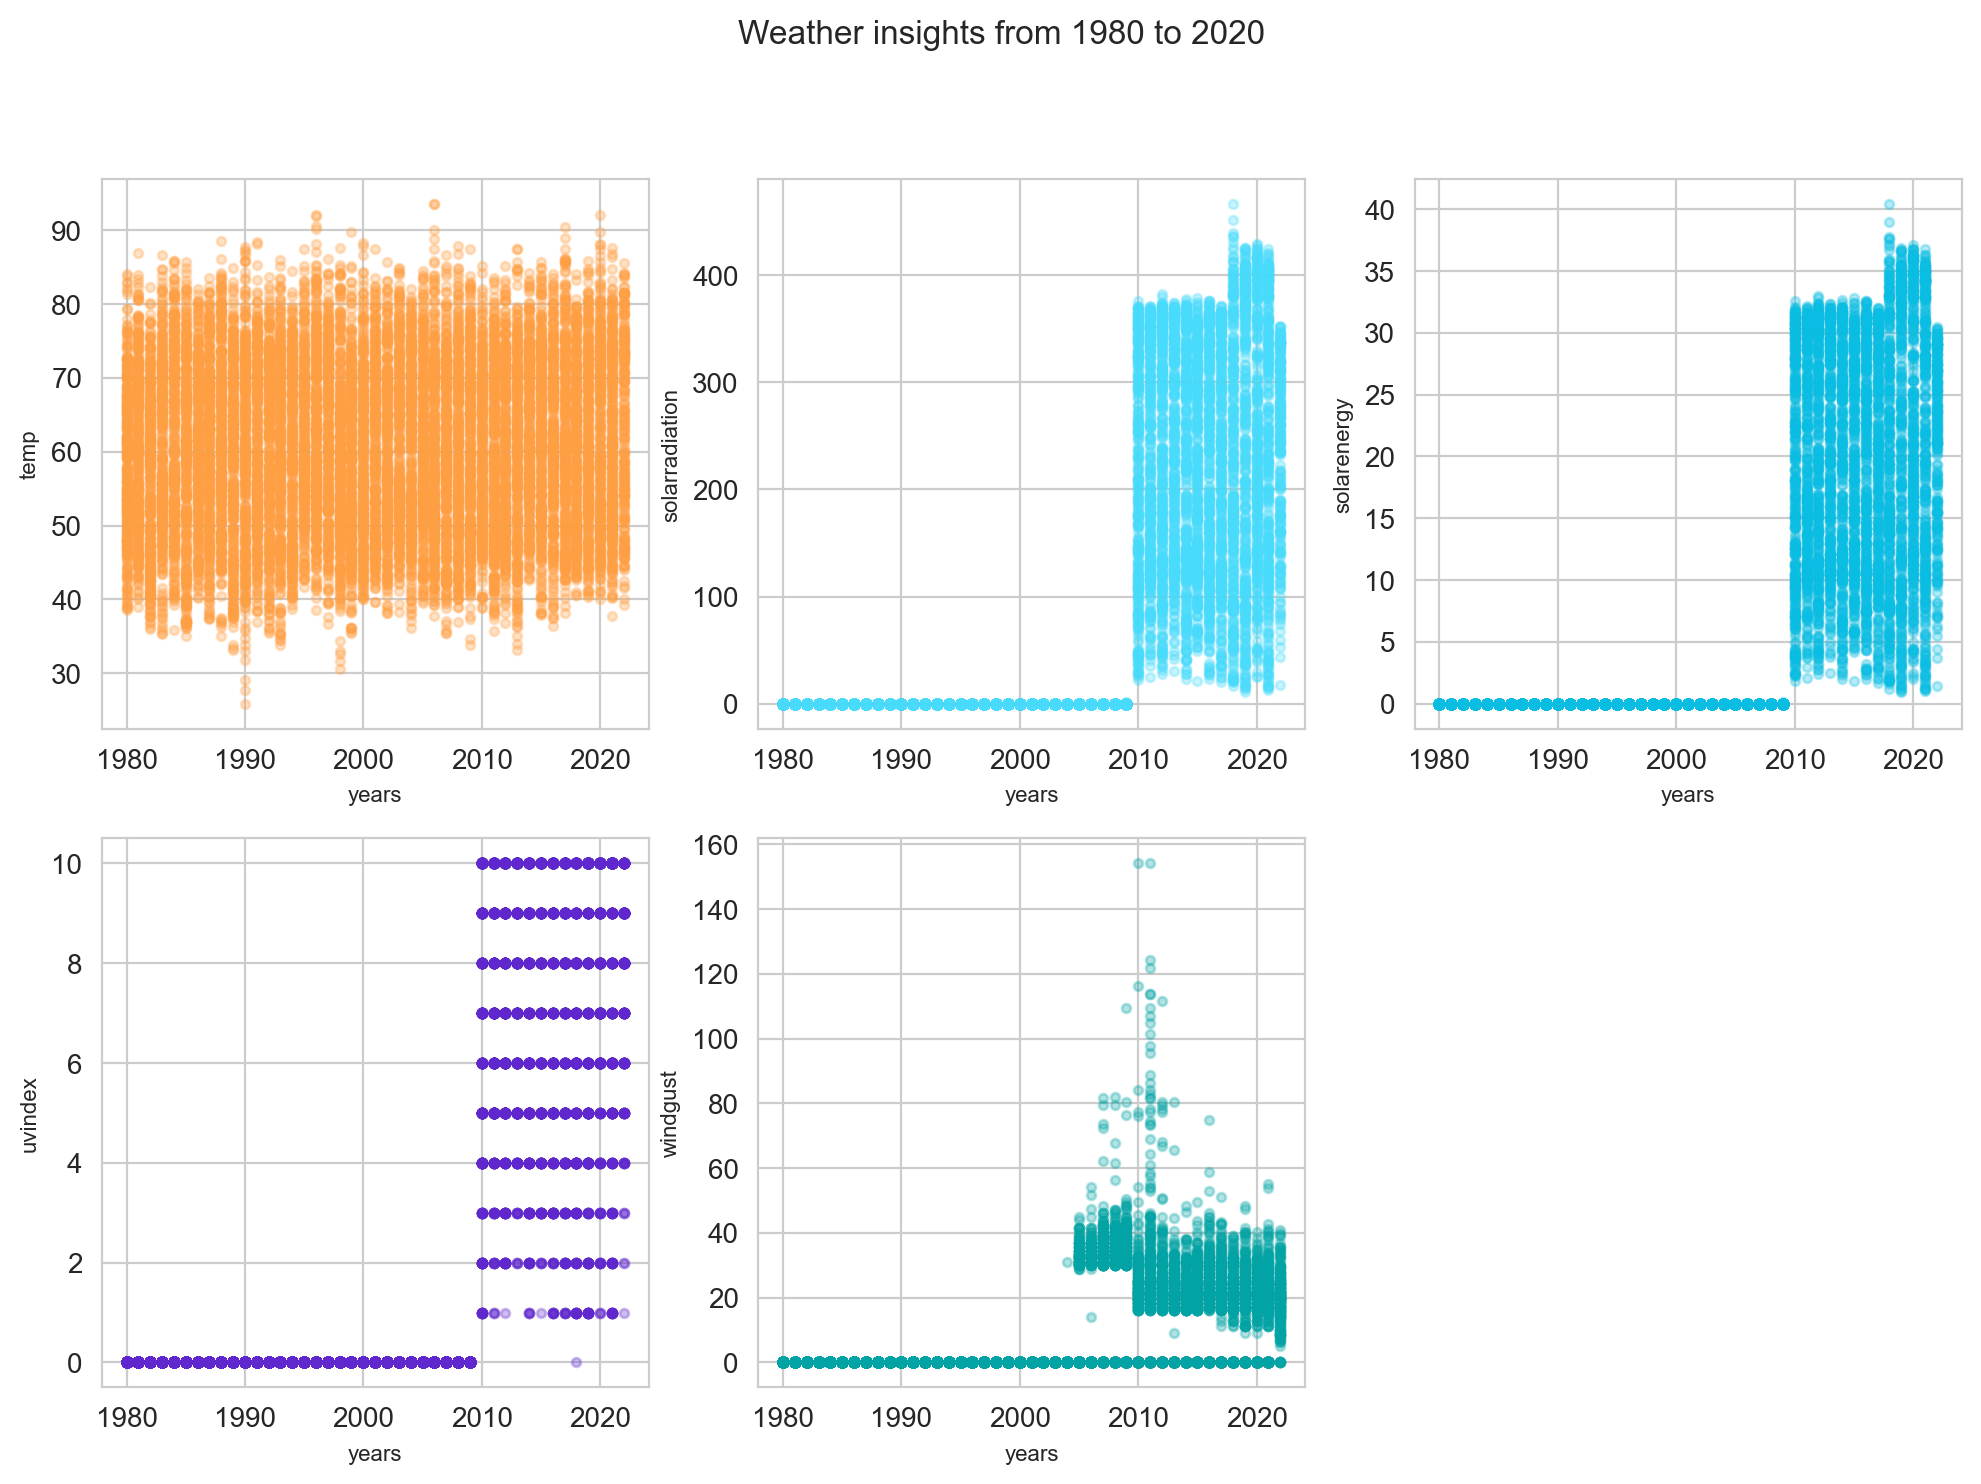

In [31]:
fig,ax = plt.subplots(2,3, figsize=(12,8), dpi=200)
ax[0,0].scatter(data['year'], data['temp'], s=10, alpha=.3, color='#ff9f43')
ax[0,0].set_xlabel('years', fontsize=8)
ax[0,0].set_ylabel('temp', fontsize=8)

ax[0,1].scatter(data['year'], data['solarradiation'], color='#48dbfb', s=10, alpha=.3)
ax[0,1].set_xlabel('years', fontsize=8)
ax[0,1].set_ylabel('solarradiation', fontsize=8)

ax[0,2].scatter(data['year'], data['solarenergy'], color='#0abde3', s=10, alpha=.3)
ax[0,2].set_xlabel('years', fontsize=8)
ax[0,2].set_ylabel('solarenergy', fontsize=8)

ax[1,0].scatter(data['year'], data['uvindex'], color='#5f27cd', s=10, alpha=.3)
ax[1,0].set_xlabel('years', fontsize=8)
ax[1,0].set_ylabel('uvindex', fontsize=8)

ax[1,1].scatter(data['year'], data['windgust'], color='#01a3a4', s=10, alpha=.3)
ax[1,1].set_xlabel('years', fontsize=8)
ax[1,1].set_ylabel('windgust', fontsize=8)

ax[1,2].remove()

plt.suptitle('Weather insights from 1980 to 2020');
plt.savefig('weather insights', bbox_inches='tight')